In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU,Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np
import string
import pandas as pd

C:\Users\JU486WK\Anaconda2\envs\py37_test\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\JU486WK\Anaconda2\envs\py37_test\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\JU486WK\Anaconda2\envs\py37_test\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\JU486WK\Anaconda2\envs\py37_test\lib\site-pack

# Email sending class
### Only works with outlook, otherwise need to change email host, and server port
### For this to work with pro email account, need to check accessibility by third party applications with account manager

In [2]:
from smtplib import SMTP
from dataclasses import dataclass, asdict

class Config:

    message_template = """\
    From: {sent_from}
    To: {sent_to}
    Subject: {subject}
    
    {content}"""
    outlook_port = 587
    email_host = "smtp-mail.outlook.com"

@dataclass
class EmailContent:
    subject: str
    content: str

@dataclass
class EmailPayload(EmailContent):
    server_sender_email: str
    server_sender_password: str
    sender_email: str
    target_email: str

    def format_email(self) -> str:
        return Config.message_template.format(
            sent_from=self.sender_email, 
            sent_to=";".join(self.target_email), 
            subject=self.subject, 
            content=self.content
        )


class EmailSender:

    @staticmethod
    def build_email_content(subject: str, text: str) -> EmailContent:
        # TODO : change this if need be
        return EmailContent(subject=subject, content=text)
    
    @staticmethod
    def build_email_payload(
        email_content: EmailContent, 
        server_sender_email: str, 
        server_sender_password: str,
        sender_email: str,
        target_email: str
    ) -> EmailPayload:
        # TODO : change this if need be
        if not server_sender_email.endswith("@gds.ey.com") and not server_sender_email.endswith("@outlook.com"):
            raise ValueError("Sender email must end with either '@gds.ey.com' or '@outlook.com'")
        return EmailPayload(
            **asdict(email_content), 
            server_sender_email=server_sender_email, 
            server_sender_password=server_sender_password,
            sender_email=sender_email,
            target_email=target_email
        )

    @staticmethod
    def send_email(email_payload: EmailPayload) -> None:
        print("Creating SMTP server")
        server = SMTP(host=Config.email_host, port=Config.outlook_port)
        print("Starting SMTP server")
        server.starttls()
        print("Logging in")
        server.login(email_payload.server_sender_email, email_payload.server_sender_password)
        print("Sending email")
        server.sendmail(
            from_addr=email_payload.server_sender_email, 
            to_addrs=email_payload.target_email, 
            msg="\n" + email_payload.format_email()
        )
        print("Closing the server")
        server.close()

## Text pre-processing

In [3]:
def clean_text(txt):
    txt = "".join(w for w in txt if w not in string.punctuation).lower()
    txt = txt.encode("utf8").decode("ascii","ignore")
    return txt

In [4]:
tokenizer = Tokenizer()
data = open('input_data2.txt','r', encoding='utf-8').read()
corpus = data.lower().split("\n")
corpus=[clean_text(x) for x in corpus]
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [5]:
#df = pd.read_csv('input_data2.csv',encoding= 'unicode_escape')
#df

In [6]:
#tokenizer = Tokenizer()
##data = open('input_data2.txt','r', encoding='utf-8').read()
#corpus = df['Text']
#corpus=[clean_text(x) for x in corpus]
#tokenizer.fit_on_texts(corpus)
#total_words = len(tokenizer.word_index) + 1

In [7]:
tokenizer.word_index

{'you': 1,
 'your': 2,
 'and': 3,
 'team': 4,
 'best': 5,
 'ey': 6,
 'on': 7,
 'the': 8,
 'regards': 9,
 'hr': 10,
 'congratulations': 11,
 'of': 12,
 'award': 13,
 'to': 14,
 'we': 15,
 'winning': 16,
 'this': 17,
 'i': 18,
 'it': 19,
 'for': 20,
 'hard': 21,
 'work': 22,
 'have': 23,
 'happy': 24,
 'birthday': 25,
 'all': 26,
 'wishes': 27,
 'is': 28,
 'day': 29,
 'celebrate': 30,
 'promotion': 31,
 'in': 32,
 'achieve': 33,
 'with': 34,
 'incredible': 35,
 'do': 36,
 'so': 37,
 'an': 38,
 'amazing': 39,
 'are': 40,
 'a': 41,
 'our': 42,
 'hope': 43,
 'come': 44,
 'true': 45,
 'special': 46,
 'get': 47,
 'out': 48,
 'there': 49,
 'wishing': 50,
 'biggest': 51,
 'slice': 52,
 'today': 53,
 'new': 54,
 'post': 55,
 'deserved': 56,
 'spot': 57,
 'stands': 58,
 'alone': 59,
 'proudly': 60,
 'witnessing': 61,
 'dedication': 62,
 'makes': 63,
 'shining': 64,
 'midst': 65,
 'names': 66,
 'fame': 67,
 'keep': 68,
 'going': 69,
 'life': 70,
 'dreams': 71,
 'congratulation': 72,
 'achievement'

In [8]:
corpus

['happy birthday hope all your birthday wishes come true it is your special day  get out there and celebrate wishing you the biggest slice of happy today best regards ey hr team ',
 'congratulations on promotion best wishes for your new post you deserved the promotion  best regards ey hr team',
 'congratulations on the spot award winning this award stands alone proudly witnessing your hard work and dedication this award makes you shining in midst of names and fame keep going in your life and achieve your all dreams with your hard work congratulation for your achievement  best regards ey hr team',
 'congratulations on best team award winning congratulations on your incredible success i always knew you could do it and i am incredibly proud of you  best regards ey hr team',
 'congratulations on quarterly award winning i saw you work so hard every day to achieve this accomplishment and i can not think of anyone who deserves it more you set an amazing example for everyone at the company  be

In [9]:
for line in corpus:
    print(line)
    print("___________________________________")

happy birthday hope all your birthday wishes come true it is your special day  get out there and celebrate wishing you the biggest slice of happy today best regards ey hr team 
___________________________________
congratulations on promotion best wishes for your new post you deserved the promotion  best regards ey hr team
___________________________________
congratulations on the spot award winning this award stands alone proudly witnessing your hard work and dedication this award makes you shining in midst of names and fame keep going in your life and achieve your all dreams with your hard work congratulation for your achievement  best regards ey hr team
___________________________________
congratulations on best team award winning congratulations on your incredible success i always knew you could do it and i am incredibly proud of you  best regards ey hr team
___________________________________
congratulations on quarterly award winning i saw you work so hard every day to achieve thi

In [10]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [11]:
input_sequences

[[24, 25],
 [24, 25, 43],
 [24, 25, 43, 26],
 [24, 25, 43, 26, 2],
 [24, 25, 43, 26, 2, 25],
 [24, 25, 43, 26, 2, 25, 27],
 [24, 25, 43, 26, 2, 25, 27, 44],
 [24, 25, 43, 26, 2, 25, 27, 44, 45],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46, 29],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46, 29, 47],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46, 29, 47, 48],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46, 29, 47, 48, 49],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46, 29, 47, 48, 49, 3],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46, 29, 47, 48, 49, 3, 30],
 [24, 25, 43, 26, 2, 25, 27, 44, 45, 19, 28, 2, 46, 29, 47, 48, 49, 3, 30, 50],
 [24,
  25,
  43,
  26,
  2,
  25,
  27,
  44,
  45,
  19,
  28,
  2,
  46,
  29,
  47,
  48,
  49,
  3,
  30,
  50,
  1],
 [24,
  25,


In [12]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [13]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [14]:
len(label)

260

# Bidirectional LSTM

In [15]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
#model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 63, 100)           12600     
_________________________________________________________________
bidirectional (Bidirectional (None, 63, 300)           301200    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 63)                6363      
_________________________________________________________________
dense_1 (Dense)              (None, 126)               8064      
Total params: 488,627
Trainable params: 488,627
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
260/260 [==============================] - 15s 56ms/sample - loss: 5.5757 - acc: 0.0231
Epoch 2/100
260/260 [==============================] - 10s 37ms/sample - loss: 5.4525 - acc: 0.0615
Epoch 3/100
260/260 [==============================] - 10s 37ms/sample - loss: 5.2745 - acc: 0.0654
Epoch 4/100
260/260 [==============================] - 9s 36ms/sample - loss: 5.0645 - acc: 0.0615
Epoch 5/100
260/260 [==============================] - 8s 32ms/sample - loss: 4.9076 - acc: 0.0692
Epoch 6/100
260/260 [==============================] - 8s 32ms/sample - loss: 4.7832 - acc: 0.0654
Epoch 7/100
260/260 [==============================] - 8s 30ms/sample - loss: 4.6807 - acc: 0.0808
Epoch 8/100
260/260 [==============================] - 8s 30ms/sample - loss: 4.5898 - acc: 0.0846
Epoch 9/100
260/260 [==============================] - 8s 30ms/sample - loss: 4.5384 - acc: 0.0692
Epoch 10/100
260/260 [==============================] - 8s

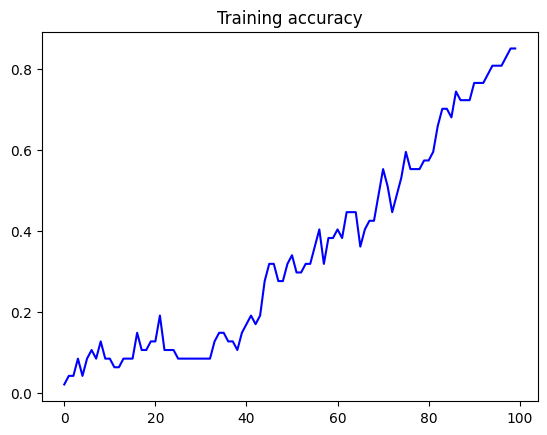

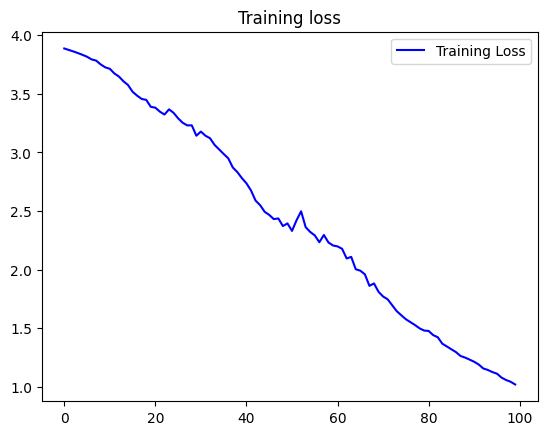

In [170]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [171]:
seed_text = "Happy Birthday Debopriya!"
next_words = 10

In [172]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    predict_x=model.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Happy Birthday Debopriya! hope all your your birthday wishes come true its your


In [174]:
seed_text = "Congratulations on promotion!"
next_words = 15

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    predict_x=model.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    #print(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Congratulations on promotion! best wishes your your new deserved wishes deserved the promotion best regards ey hr team


# GRU

In [17]:
model1 = Sequential()
model1.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model1.add(Bidirectional(GRU(64,
                        return_sequences=True,
                        recurrent_initializer='glorot_uniform')))

#model1.add((GRU(64,
#                        return_sequences=True,
#                        recurrent_initializer='glorot_uniform')))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(total_words, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(Dense(total_words, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 63, 100)           12600     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 63, 128)           63360     
_________________________________________________________________
dropout (Dropout)            (None, 63, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8064)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 126)               1016190   
_________________________________________________________________
dense_3 (Dense)              (None, 126)               16002     
Total params: 1,108,152
Tra

In [18]:
history = model1.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
260/260 [==============================] - 5s 20ms/sample - loss: 6.6046 - acc: 0.0231
Epoch 2/100
260/260 [==============================] - 2s 6ms/sample - loss: 5.3394 - acc: 0.0423
Epoch 3/100
260/260 [==============================] - 2s 7ms/sample - loss: 4.8070 - acc: 0.0615
Epoch 4/100
260/260 [==============================] - 2s 7ms/sample - loss: 4.6378 - acc: 0.1000
Epoch 5/100
260/260 [==============================] - 2s 7ms/sample - loss: 4.5749 - acc: 0.0769
Epoch 6/100
260/260 [==============================] - 2s 6ms/sample - loss: 4.4602 - acc: 0.1038
Epoch 7/100
260/260 [==============================] - 2s 6ms/sample - loss: 4.3206 - acc: 0.1077
Epoch 8/100
260/260 [==============================] - 2s 6ms/sample - loss: 4.1790 - acc: 0.1385
Epoch 9/100
260/260 [==============================] - 2s 6ms/sample - loss: 3.9780 - acc: 0.1731
Epoch 10/100
260/260 [==============================] - 2s 7ms/sample - loss: 3.8095 - acc: 0.1769
Epoch 11/100
260/2

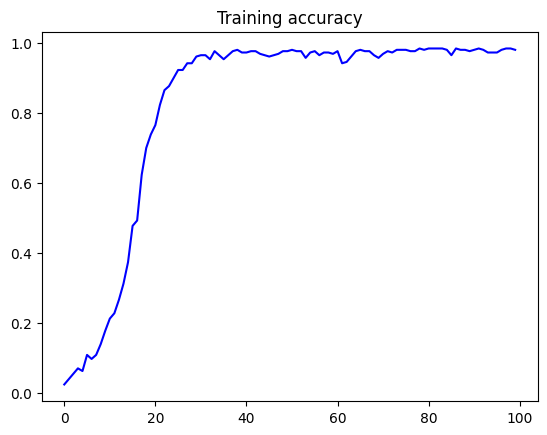

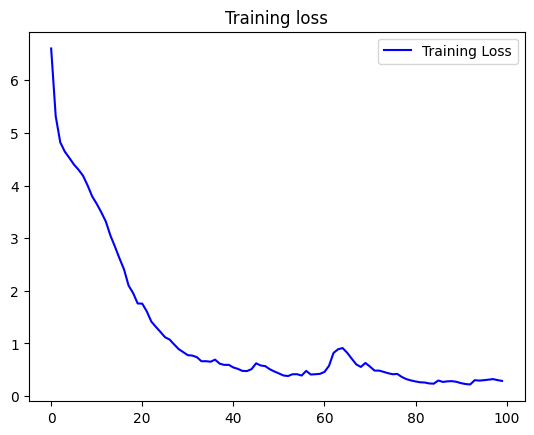

In [281]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [19]:
seed_text = "Happy Birthday!"
original_seed_text = seed_text
next_words = 30

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    predict_x=model1.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    #print(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Happy Birthday! hope all your birthday wishes come true it is your special day get out there and celebrate wishing you the biggest slice of happy today best regards ey hr team


In [20]:
subject = original_seed_text
content = seed_text
server_sender_email = "nilanjan-sender@outlook.com"
server_sender_password = "LX5m3NLPcBr52Rg"
# server_sender_email = "Nilanjan.Mukherjee@gds.ey.com" 
# server_sender_password = "Liverpool@135790"
sender_email = "Nilanjan.Mukherjee@gds.ey.com"
target_email = "mukherjee.nilanjan@yahoo.in"
# target_email = "Nilanjan.Mukherjee@gds.ey.com"

email_content = EmailSender.build_email_content(text=content, subject=subject)
email_payload = EmailSender.build_email_payload(
    email_content=email_content, 
    server_sender_email=server_sender_email, 
    server_sender_password=server_sender_password,
    sender_email=sender_email,
    target_email=target_email
)

EmailSender.send_email(email_payload=email_payload)

Creating SMTP server
Starting SMTP server
Logging in
Sending email
Closing the server


In [21]:
seed_text = "Congratulations on promotion!"
next_words = 15

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    predict_x=model1.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    #print(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Congratulations on promotion! best wishes for your new post you deserved the promotion best regards ey hr team


In [22]:
subject = original_seed_text
content = seed_text
server_sender_email = "nilanjan-sender@outlook.com"
server_sender_password = "LX5m3NLPcBr52Rg"
# server_sender_email = "Nilanjan.Mukherjee@gds.ey.com" 
# server_sender_password = "Liverpool@135790"
sender_email = "Nilanjan.Mukherjee@gds.ey.com"
#target_email = "mukherjee.nilanjan@yahoo.in"
target_email = "Nilanjan.Mukherjee@gds.ey.com"

email_content = EmailSender.build_email_content(text=content, subject=subject)
email_payload = EmailSender.build_email_payload(
    email_content=email_content, 
    server_sender_email=server_sender_email, 
    server_sender_password=server_sender_password,
    sender_email=sender_email,
    target_email=target_email
)

EmailSender.send_email(email_payload=email_payload)

Creating SMTP server
Starting SMTP server
Logging in
Sending email
Closing the server


In [285]:
seed_text = "Congratulations on the spot Award Winning!"
next_words = 45

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    predict_x=model1.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    #print(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Congratulations on the spot Award Winning! this award stands alone proudly witnessing your hard work and dedication this award makes you shining in midst of names and fame keep going in your life and achieve your all dreams with your hard work congratulation for your achievement best regards ey hr team


In [288]:
seed_text = "Congratulations on CVB Award winning!"
next_words = 39
#seed_text = clean_text(seed_text_org.lower())
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    predict_x=model1.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    #print(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Congratulations on CVB Award winning! winning i saw you work so hard every day to achieve this accomplishment and i can not think of anyone who deserves it more you set an amazing example for everyone at the company best regards ey hr team


In [289]:

seed_text = "Congratulations on xyz Award Winning!"
next_words = 25

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    predict_x=model1.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    #print(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Congratulations on xyz Award Winning! congratulations on the amazing news this is an incredible milestone and you deserve the spotlight to celebrate the moment best regards ey hr team team


In [292]:
# Giving text which is outside traning dataset

seed_text = "Congratulations on winning EY Appreciate Award!"
next_words = 30

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    predict_x=model1.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    #print(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Congratulations on winning EY Appreciate Award! for your new stands you deserved every day to achieve and accomplishment and you can the think of anyone and deserves it more you set an amazing example for everyone


In [293]:

seed_text = "Welcome to EY Thisu!"
next_words = 60

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    predict_x=model1.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    #print(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Welcome to EY Thisu! we are thrilled to have you with us we had a lot of applicants and we chose you because we believe that your skills experience and creativity will have a real impact on our team we are so excited to have you be part of our team and we cant wait to see what you do best regards ey hr
